# Text Data: an introduction
## What is text data?
- Text data is a data structure that represents information in the form of text. It is a collection of words, sentences, and paragraphs that is readable and includes alphabets and numbers. Text data is everywhere, being one of the most common forms of data that is generated by humans in the form of blogs, tweets, comments, and so on.

- But, text data is **unstructured data**, and it is not easy to extract information from it.  Text data is **also known as natural language data**.

- NLP (Natural Language Processing) is a field of computer science that deals with the interaction between computers and humans using the natural language.

### Basic definitions

A text document is a collection of words, sentences, and paragraphs. All in all it not more than a string.

#### Corpus
 The **corpus** is (a large and) structured collection of texts or written materials that are used for linguistic analysis, research, or language modeling purposes.

#### Lexicon
The **lexicon** of a language is the set of all words in that language. It is also called the **vocabulary** of the language.

**words** are also called **terms** and, in some contexts, **tokens**.

#### $n$-grams

$n$-grams are contiguous sequences of $n$ items from a given sample of text or speech. In the context of natural language processing, an $n$-gram typically refers to a sequence of $n$ words or characters.

For example, let's consider the sentence: "I love to code." Here are some examples of $n$-grams with different values of $n$:

- Unigrams ($n = 1$): ["I", "love", "to", "code"]
- Bigrams ($n = 2$): ["I love", "love to", "to code"]
- Trigrams ($n = 3$): ["I love to", "love to code"]
- 4-grams ($n = 4$): ["I love to code"]

The longer the $n$-gram (the higher the value of $n$), the more context you have to work with. In general, a larger $n$-gram generally means more context, which means a better understanding of the structure and sentiment of a text. The optimal value of $n$ depends on the application and the dataset. For example, in spam detection, unigrams perform better than bigrams and trigrams, while for authorship attribution, character 4-grams work better than word 4-grams.

#### Example
Example, given the list of documents:
- D1: "I like to play football"
- D2: "I hate football"
- D3: "I like to play tennis"

As a result

- The lexicon is: {I, like, to, play, football, hate, tennis}.
- The corpus is: {D1, D2, D3}.
- The 2-grams / bigrams are: {I like, like to, to play, play football, I hate, hate football, like to, to play, play tennis}.


## Applications of text data
Text data is used in many applications, such as:
- **Sentiment analysis**: Sentiment analysis is the process of analyzing the sentiment of a piece of text. It is used to determine whether the sentiment of a piece of text is positive, negative, or neutral. It is used in many applications, such as social media monitoring, brand monitoring, and customer service.
- **Text classification**: Text classification is the process of classifying text into different categories. It is used in many applications, such as spam detection, sentiment analysis, and topic classification.
- **Text summarization**: Text summarization is the process of summarizing text into a shorter version. It is used in many applications, such as news summarization, document summarization, and email summarization.
- **Machine translation**: Machine translation is the process of translating text from one language to another. It is used in many applications, such as language translation, document translation, and website translation.
- **Question answering**: Question answering is the process of answering questions. It is used in many applications, such as question answering systems, question answering systems, and question answering systems.
- **Information retrieval**: Information retrieval is the process of retrieving information from a collection of documents.
- etc.


## Basic feature extraction techniques
### Dataset

In this notebook we'll use the Large Movie Review Dataset v1.0, retrieved from http://ai.stanford.edu/~amaas/data/sentiment/.

This dataset contains movie reviews along with their associated binary sentiment polarity labels. It is intended to serve as a benchmark for sentiment classification.


The core dataset contains 50,000 reviews split evenly into 25k train and 25k test sets. The overall distribution of labels is balanced (25k pos and 25k neg). It is also include an additional 50,000 unlabeled documents for unsupervised learning, which we will not use in this notebook.

In the entire collection, no more than 30 reviews are allowed for any given movie because reviews for the same movie tend to have correlated ratings. Further, the train and test sets contain a disjoint set of movies, so no significant performance is obtained by memorizing movie-unique terms and their associated with observed labels.  In the labeled train/test sets, a negative review has a score <= 4 out of 10, and a positive review has a score >= 7 out of 10. Thus reviews with more neutral ratings are not included in the train/test sets. In the unsupervised set, reviews of any rating are included and there are an even number of reviews > 5 and <= 5.

Please read the README (in the aclImdb.zip) for more details. We will use the file imdb_data.csv.zip which is the compiled version of the dataset.

In [1]:
import pandas as pd

df = pd.read_csv('./data/IMDB/imdb_data_train.zip')

print('shape = ', df.shape)
df.head()

shape =  (25000, 4)


,filename,review,classification,sentiment
0,1821_4.txt,Working with one of the best Shakespeare sourc...,4,0
1,10402_1.txt,"Well...tremors I, the original started off in ...",1,0
2,1062_4.txt,Ouch! This one was a bit painful to sit throug...,4,0
3,9056_1.txt,"I've seen some crappy movies in my life, but t...",1,0
4,5392_3.txt,"""Carriers"" follows the exploits of two guys an...",3,0


For example, a review is something like:

In [2]:
print('--> review:', df.loc[42, 'review'])
print('--> classification:', df.loc[42, 'classification'])
print('--> sentiment:', df.loc[42, 'sentiment'])

--> review: This is the biggest piece of lamo I've ever watched. It is excruciatingly boring I would have rather sat through a seminar on creationism than have watched this if i had known it was going to be as boring as it was. Not even the 40 seconds of the hot chick in the bikini with the big ta tas redeems this of anything lower than a 1.<br /><br />The reviews of this movie claiming that this movie is "unintentionally funny" are absurd and just plain WRONG. Not one thing is funny about this movie. they spend the first 50 or so minutes walking through the woods talking about stuff you wouldn't understand nor care about and it is just as lame when the people start dying because you don't even know who the people are because they are so UNINTERESTING. Honestly though, I didn't watch it to the ending, but that should say something about how horrible it is. WORST MOVIE EVER.<br /><br />Immediately after ejecting this filth from my DVD player I started scraping it against the cement in f

This set of reviews builds out corpus of text data.

### Number of words

Counting of words in a document is a basic feature extraction technique.

We can use the `split()` function to count the number of words in a document. The split function splits a string into a list separated by a delimiter. The default delimiter is a space.

In [3]:
df['#words'] = df['review'].apply(lambda x: len(str(x).split(" ")))
df[['review', '#words']].head()

,review,#words
0,Working with one of the best Shakespeare sourc...,41
1,"Well...tremors I, the original started off in ...",188
2,Ouch! This one was a bit painful to sit throug...,122
3,"I've seen some crappy movies in my life, but t...",354
4,"""Carriers"" follows the exploits of two guys an...",794


### Number of characters
Counting the number of characters in a document is also a basic feature extraction technique.

In [4]:
df['#chars'] = df['review'].str.len()
df.head()

,filename,review,classification,sentiment,#words,#chars
0,1821_4.txt,Working with one of the best Shakespeare sourc...,4,0,41,250
1,10402_1.txt,"Well...tremors I, the original started off in ...",1,0,188,1025
2,1062_4.txt,Ouch! This one was a bit painful to sit throug...,4,0,122,681
3,9056_1.txt,"I've seen some crappy movies in my life, but t...",1,0,354,2004
4,5392_3.txt,"""Carriers"" follows the exploits of two guys an...",3,0,794,4687


### Average word length
Average word length is a feature extraction technique that is used to find the average length of all the words in a document.

In [5]:
def avg_word(sentence):
  words_lens = [len(word) for word in sentence.split()]
  return sum(words_lens)/len(words_lens)

df['avg_word_len'] = df['review'].apply(lambda x: avg_word(x))

df[['review', 'avg_word_len']].head()

,review,avg_word_len
0,Working with one of the best Shakespeare sourc...,5.121951
1,"Well...tremors I, the original started off in ...",4.457447
2,Ouch! This one was a bit painful to sit throug...,4.590164
3,"I've seen some crappy movies in my life, but t...",4.663842
4,"""Carriers"" follows the exploits of two guys an...",4.904282


### Number of Stopwords
Stopwords are the words that are most commonly used in a language, such as "the", "a", "an", "in", and "on". **These words do not add any meaning to a sentence**. Stopwords are removed to reduce the dimensionality of the data and to remove noise from the data. (see https://en.wikipedia.org/wiki/Stop_word)

Obviously, stop words are language dependent.
- In English, stopwords are, for example: "the", "a", "an", "in", "on", etc.
- In Portuguese, stopwords are, for example: "o", "a", "os", "as", "em", "sobre", etc.
- In Spanish, stopwords are, for example: "el", "la", "los", "las", "en", "sobre", etc.
- In japanese, stopwords are, for example: "の", "に", "は", "を", "た", "が", etc. (!)

We can use the `nltk` library to count the number of stopwords in a document. The `nltk` library is a collection of natural language processing libraries. It is used to perform various natural language processing tasks, such as tokenization, stemming, lemmatization, and so on.

In [6]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
stop_words = stopwords.words('english')

stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
df['#stopwords'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop_words]))

df[['review', '#stopwords']].head()

,review,#stopwords
0,Working with one of the best Shakespeare sourc...,16
1,"Well...tremors I, the original started off in ...",80
2,Ouch! This one was a bit painful to sit throug...,52
3,"I've seen some crappy movies in my life, but t...",145
4,"""Carriers"" follows the exploits of two guys an...",339


#### Personalized stop words list

**Using a preexisting collection of stop words may seem convenient, but it often proves inadequate for specific applications**. Take clinical texts, for instance, where words like "mcg," "dr.," and "patient" appear frequently in almost every document. In the context of clinical text mining and retrieval, these terms can be considered as potential stop words. Likewise, when dealing with tweets, terms like "#," "RT," and "@username" may qualify as potential stop words. Unfortunately, the standard list of language-specific stop words fails to encompass these domain-specific terms.

To set our own stop words, e.g, we can use the following rules:
1. set the $n$-most frequent terms in the corpus as stop words
2. set the $n$-least frequent terms in the corpus as stop words
3. set the $n$-least IDF score terms as stop words (see below)
4. ...

### Number of special characters
Special characters include `!`, `@`, `#`, `$`, `%`, etc. We can use the `count()` function to count the number of special characters in a document. This can be useful in detecting spam, which often contains a lot of special characters.

For instance, the number of exclamations can be used the level of excitement, surprise, anger etc. in a document.

In [8]:
df['#exclamations'] = df['review'].str.count('!')

df[['review', '#exclamations']].sort_values(by='#exclamations', ascending=False).head()

,review,#exclamations
15598,Smallville episode Justice is the best episode...,282
23910,Smallville episode Justice is the best episode...,282
15963,This movie is the only movie to feature a scen...,160
16581,during eddie murphy's stand up a women from th...,88
11464,"this is a terrible, terrible film!!!!!!!!!<br ...",70


In [9]:
df.loc[15598, 'review']

"Smallville episode Justice is the best episode of Smallville ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! It's my favorite episode of Smallville! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !"

For example, in twitter, special characters are used to tag topics, so counting special characters can be useful in topic detection.

In [10]:
df['#topics'] = df['review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

df[['review', '#topics']].sort_values(by='#topics', ascending=False).head()

,review,#topics
1144,"After reading the previous comments, I'm just ...",26
7999,I see a lot of people liked this movie. To me ...,10
2445,"My thoughts on the movie, 9<br /><br />It was ...",7
22020,"My Comments for VIVAH :- Its a charming, ideal...",6
24869,I believe that The Sopranos is an awesome show...,5


### Number of numerics
We can use the `isdigit()` function to count the number of numerics in a document.
This can be useful in detecting spam, which often contains a lot of numerics.


In [11]:
df['#numerics'] = df['review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['review', '#numerics']].head()

,review,#numerics
0,Working with one of the best Shakespeare sourc...,0
1,"Well...tremors I, the original started off in ...",1
2,Ouch! This one was a bit painful to sit throug...,0
3,"I've seen some crappy movies in my life, but t...",5
4,"""Carriers"" follows the exploits of two guys an...",0


### Number of uppercase words
Uppercase words can be used to express anger or excitement. We can use the `isupper()` function to count the number of uppercase words in a document.
In our case, maybe is not so useful, as we can see in uppercase words list below.

In [12]:
df['#upper'] = df['review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['upper'] = df['review'].apply(lambda x: [x for x in x.split() if x.isupper()])

df[['review', 'upper', '#upper']].sort_values(by='#upper', ascending=False).head(10)

,review,upper,#upper
9542,Kareena Kapoor in a bikini hmmmmmmmm.<br /><br...,"[YOU, FEEL, A, SORT, OF, IRRITATION, MIXED, WI...",151
476,This serial is interesting to watch as an MST3...,"[MST3K, I, NONE, MST3K, I, />(TOM, SERVO, SING...",144
16484,THE INVADERS IS A FAST MOVING SCI-FI THRILLER ...,"[THE, INVADERS, IS, A, FAST, MOVING, SCI-FI, T...",122
22454,Re: Pro Jury<br /><br />Although the lead actr...,"[STRIKINGLY, I, />""EASILY, GIVE, AWAY, VIRGINI...",122
22478,Was'nt really bad for Raw's first PPV of 006. ...,"[PPV, />FIRST, MATCH-, RIC, FLAIR, VS., EDGE, ...",120
11543,"Look,I'm reading and reading this comments and...","[I, I, I, I, I, DID, BIG, I, I, I, I, I, I, BI...",118
748,DO NOT WATCH THIS MOVIE IF YOU LOVED THE CLASS...,"[DO, NOT, WATCH, THIS, MOVIE, IF, YOU, LOVED, ...",92
22023,"By 1945, and after a string of solid WWII prop...","[WWII, U.S., ADVENTURES, OF, DON, JUAN, KIM, T...",72
22341,The freedom of having your own Sea Going Power...,"[""SEA, RKO, UNDERWATER!, RKO, RPM, NBC, ""YOUR,...",66
3234,I dug this out and watched it tonight. I hones...,"[I, I, I, I, I, THIS, />I, I, I, (I, LIKED, AS...",65


In [13]:
df.loc[9542, 'review']

"Kareena Kapoor in a bikini hmmmmmmmm.<br /><br />Akshay Kumar...<br /><br />Anil Kapoor....<br /><br />Maybe Saif....<br /><br />Kareena Kapoor in a bikini.....<br /><br />Good Banner..<br /><br />Kareena Kapoor in a bikini.....<br /><br />Not one good reason not to see this movie....<br /><br />Or so i thought ........Didnt these people make JBJ...<br /><br />Why o Why did i forget that.<br /><br />For all the criticism the first half of the movie isn't that bad...<br /><br />There is some intrigue and YOU FEEL A SORT OF IRRITATION MIXED WITH EXCITEMENT THAT I FELT WHEN SEEING GUY RITCHIE MOVIES LIKE LOCK STOCK AND SNATCH.<br /><br />Kareena Kapoor is sizzling in a very skinny model sort of way.<br /><br />Akshay Kumar is Akshay Kumar as only he can be.<br /><br />Anil Kapoor is annoying but kind of funny, YOU ALMOST FORGET THAT MOST OF THE TIME YOU CANNOT UNDERSTAND HIM.<br /><br />Saif is sidey ala Main Khiladi.. once again.<br /><br />There is the occasional laugh and a few chuckl


## Basic Text Pre-processing of text data
So far, we have seem how to extract basic features from text data. Now, we will see how to pre-process text data before extracting features from it.

- **Pre-processing** refers to the transformations applied to our data before feeding it to some algorithm. In the context of text data, it is also known as **text cleaning and pre-processing**.

So, text normalization, also known as text standardization, is a process that transforms text into a consistent or canonical form. Its purpose is to ensure uniformity and facilitate text processing and analysis. The normalization process is not a one-size-fits-all approach and can involve various techniques.

For example, one common step in normalization is converting all text to lowercase. This straightforward and widely applicable method is effective for text pre-processing. Additionally, dealing with misspelled words, acronyms, short forms, and out-of-vocabulary terms is another approach. For instance, terms like "super," "superb," and "superrrr" can be normalized to "super." By applying text normalization techniques, the noise and disruptions in the text data are handled, resulting in cleaner, more reliable data.

Stemming and lemmatization are also employed as part of text normalization. Stemming reduces words to their base or root form, while lemmatization aims to bring words to their canonical or dictionary form. These techniques further contribute to word normalization in text processing.

All in all, the texts are transformed from a sequencial list of words to a multidimensional vector of numbers, as we will see below.

### $n$-grams
Remember, an $n$-gram is a contiguous sequence of $n$ items from a given sample of text or speech.

the nltk library provides a function to split text into $n$-grams. We can use the `ngrams()` function from the `nltk.util` module to generate $n$-grams from a sequence of tokens. The `ngrams()` function takes in two arguments: the sequence of tokens and the value of $n$.

In [14]:
# build the n-grams for the reviews
from nltk.util import ngrams

# build the n-grams for the reviews
df['review_ngrams'] = df['review'].apply(lambda x: list(ngrams(x.split(), 2)))

df[['review', 'review_ngrams']]

,review,review_ngrams
0,Working with one of the best Shakespeare sourc...,"[(Working, with), (with, one), (one, of), (of,..."
1,"Well...tremors I, the original started off in ...","[(Well...tremors, I,), (I,, the), (the, origin..."
2,Ouch! This one was a bit painful to sit throug...,"[(Ouch!, This), (This, one), (one, was), (was,..."
3,"I've seen some crappy movies in my life, but t...","[(I've, seen), (seen, some), (some, crappy), (..."
4,"""Carriers"" follows the exploits of two guys an...","[(""Carriers"", follows), (follows, the), (the, ..."
...,...,...
24995,About a year ago I finally gave up on American...,"[(About, a), (a, year), (year, ago), (ago, I),..."
24996,When I saw the elaborate DVD box for this and ...,"[(When, I), (I, saw), (saw, the), (the, elabor..."
24997,"Last November, I had a chance to see this film...","[(Last, November,), (November,, I), (I, had), ..."
24998,Great movie -I loved it. Great editing and use...,"[(Great, movie), (movie, -I), (-I, loved), (lo..."


### Bag-of-Words (BoW)
A bag-of-words (BoW) is a representation of text that describes the occurrence of words within a document. It keeps track of word counts and disregards the grammatical details and the word order.

The assumption here is that the higher the count of a word in a document, the more important it is and vice versa.

We will use the `CountVectorizer()` function from the `sklearn.feature_extraction.text` module to perform CountVectorization (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). The `CountVectorizer()` function takes in a list of strings and converts it to a matrix of integers. Each row in the matrix represents a document and each column represents a word and the corresponding cell represents the count of that word in that document.

Further, for this part, we'll restrict the corpus to the first 10 documents in the IMDB dataset.

In [15]:
# the corpus is a list of strings (documents) to analyze
corpus = df['review'].head(10)
corpus

0    Working with one of the best Shakespeare sourc...
1    Well...tremors I, the original started off in ...
2    Ouch! This one was a bit painful to sit throug...
3    I've seen some crappy movies in my life, but t...
4    "Carriers" follows the exploits of two guys an...
5    I had been looking forward to seeing this film...
6    Effect(s) without cause is generally not possi...
7    This picture started out with good intentions,...
8    I chose to see this movie because it got a goo...
9    This film has to be the worst I have ever seen...
Name: review, dtype: object

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# initialize the CountVectorizer
cv = CountVectorizer()

# fit_transform() creates the vocabulary and returns a term-document matrix
X = cv.fit_transform(corpus)

# build a dataframe with the term-document matrix
pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

,10,100,1990,1st,20,80,84,90,ability,about,...,writers,written,yeah,you,younger,your,yuck,zeta,zombie,zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,0
3,1,1,0,0,1,0,0,1,0,3,...,1,0,1,2,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,1,5,...,0,0,0,4,1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,0,1,3


Some observation can be made at once:
- the matrix is sparse, i.e., most of the cells are zero
- the matrix is not normalized, i.e., the number of words in each document is not taken into account
- the matrix contains a lot of words that might not be useful for some analysis, e.g., "a", "about", "above", "after", etc. These words are called **stop words** and they need to be removed from the corpus before performing CountVectorization.
- Depending on the context, some words have the same "meaning" but are written differently, e.g., "actor" and "actress" (should these words be merged?)

#### CountVectorizer without stop words removal
We can remove stopwords before performing CountVectorization or ask it to do it, by passing the list of stopwords to the `stop_words` parameter of the `CountVectorizer()` function or a string with the language.

In [17]:
cv = CountVectorizer(stop_words='english')

# fit_transform() creates the vocabulary and returns a term-document matrix
X = cv.fit_transform(corpus)

# build a dataframe with the term-document matrix
pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

,10,100,1990,1st,20,80,84,90,ability,absolutely,...,wouldn,wrap,writers,written,yeah,younger,yuck,zeta,zombie,zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3


#### CountVectorizer with stop words removal and $n$-grams
We can extract $n$-grams by passing the value of $n$ to the `ngram_range` parameter of the `CountVectorizer()` function.

In [18]:
cv = CountVectorizer(stop_words='english', ngram_range=(1, 2))

# fit_transform() creates the vocabulary and returns a term-document matrix
X = cv.fit_transform(corpus)

# build a dataframe with the term-document matrix
pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

,10,100,100 material,1990,1990 movie,1st,1st class,20,20 minutes,80,...,yuck,yuck br,zeta,zeta jones,zombie,zombie nation,zombies,zombies actually,zombies attack,zombies fact
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,3,1,1,1


#### Meaningfulness of the results
Bag-of-words does not bring in any information on the meaning of the text. For example, if we consider these two sentences
- “Text processing is easy but tedious.” and
- “Text processing is tedious but easy.”

a bag-of-words model would create the same vectors for both of them, even though they have different meanings.

In [19]:
corpus = [
    'Text processing is easy but tedious.',
    'Text processing is tedious but easy.'
]

cv = CountVectorizer(stop_words='english')

# fit_transform() creates the vocabulary and returns a term-document matrix
X = cv.fit_transform(corpus)

# build a dataframe with the term-document matrix
pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

,easy,processing,tedious,text
0,1,1,1,1
1,1,1,1,1


### HashingVectorizer
The `HashingVectorizer()` function from the `sklearn.feature_extraction.text` module is another technique that is used to extract features from text (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html). It is also known as `Hashing Trick`.

In this technique, we simply **apply a hash function to the terms to convert them into numeric values**. The assumption here is that the hash function will assign unique indexes to the terms and hence we will not need to store the vocabulary explicitly. This will help us save memory.

Further, it turns a collection of text documents into a `scipy.sparse matrix` holding token occurrence counts (or binary occurrence information), possibly normalized as token frequencies if `norm=’l1’` or projected on the euclidean unit sphere if `norm=’l2’`.

This strategy has several advantages:
- it is very **low memory** scalable to large datasets as there is no need to store a vocabulary dictionary in memory.
- it is fast to pickle and un-pickle as it holds no state besides the constructor parameters.
- it can be used in a streaming (partial fit) or parallel pipeline as there is **no state computed during fit**.

There are also a couple of cons (vs using a CountVectorizer with an in-memory vocabulary):
- there is **no way to compute the inverse transform** (from feature indices to string feature names) which can be a problem when trying to introspect which features are most important to a model.
- there can be **collisions**: distinct tokens can be mapped to the same feature index. However, in practice this is **rarely** an issue if `n_features` is large enough (e.g. $2^{18}$ for text classification problems).

In [20]:
from sklearn.feature_extraction.text import HashingVectorizer

hv = HashingVectorizer(stop_words='english',
                       n_features=500) # note: this is a very small vocabulary... in a real case, we would use a much larger vocabulary

# fit_transform() creates the vocabulary and returns a term-document matrix
X = hv.fit_transform(corpus)

print(X.shape)
# build a dataframe with the term-document matrix
pd.DataFrame(X.toarray())

(2, 500)


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For example, 'Shakespeare' is hashed to 401, 'working' is hashed to 409, ...

In [21]:
print(hv.transform(['Shakespeare', 'working']))

  (0, 401)	1.0
  (1, 409)	1.0


### Lower casing
Another preprocessing technique is to lowercase the term-document matrix. This avoids having multiple copies of the same word just because it was capitalized differently.

For instance, converting to lower case, is the default behavior of the `CountVectorizer()` function from the `sklearn.feature_extraction.text` module (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

But it can also be done manually, using the `lower()` function from the `str` module (https://docs.python.org/3/library/stdtypes.html#str.lower).

In [22]:
df['review_lower'] = df['review'].apply(lambda x: x.lower())

df[['review', 'review_lower']]

,review,review_lower
0,Working with one of the best Shakespeare sourc...,working with one of the best shakespeare sourc...
1,"Well...tremors I, the original started off in ...","well...tremors i, the original started off in ..."
2,Ouch! This one was a bit painful to sit throug...,ouch! this one was a bit painful to sit throug...
3,"I've seen some crappy movies in my life, but t...","i've seen some crappy movies in my life, but t..."
4,"""Carriers"" follows the exploits of two guys an...","""carriers"" follows the exploits of two guys an..."
...,...,...
24995,About a year ago I finally gave up on American...,about a year ago i finally gave up on american...
24996,When I saw the elaborate DVD box for this and ...,when i saw the elaborate dvd box for this and ...
24997,"Last November, I had a chance to see this film...","last november, i had a chance to see this film..."
24998,Great movie -I loved it. Great editing and use...,great movie -i loved it. great editing and use...


### Punctuation removal
Ponctuation is not useful for (basic) text analysis. We can remove it using the `replace()` function from the `re` module (https://docs.python.org/3/library/re.html).

The regular expression "[^\w\s]" matches everything that is not (^) a word character (alphanumeric character) or whitespace. then the `re.sub()` function replaces all the matches with empty string. (see https://regexr.com/ for more information about regular expressions and to test them).

In [23]:
import re

df['review_no_punctuation'] = df['review_lower'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

df[['review', 'review_no_punctuation']]

,review,review_no_punctuation
0,Working with one of the best Shakespeare sourc...,working with one of the best shakespeare sourc...
1,"Well...tremors I, the original started off in ...",welltremors i the original started off in 1990...
2,Ouch! This one was a bit painful to sit throug...,ouch this one was a bit painful to sit through...
3,"I've seen some crappy movies in my life, but t...",ive seen some crappy movies in my life but thi...
4,"""Carriers"" follows the exploits of two guys an...",carriers follows the exploits of two guys and ...
...,...,...
24995,About a year ago I finally gave up on American...,about a year ago i finally gave up on american...
24996,When I saw the elaborate DVD box for this and ...,when i saw the elaborate dvd box for this and ...
24997,"Last November, I had a chance to see this film...",last november i had a chance to see this film ...
24998,Great movie -I loved it. Great editing and use...,great movie i loved it great editing and use o...


### Stopwords removal
The remove of stopwords is a common preprocessing step in text analysis. In this example, the stopwords are removed using the `stopwords` corpus from the `nltk` module (https://www.nltk.org/).

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pcardoso/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df['review_no_stopwords'] = df['review_no_punctuation'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))

df[['review', 'review_no_stopwords']]

,review,review_no_stopwords
0,Working with one of the best Shakespeare sourc...,working one best shakespeare sources film mana...
1,"Well...tremors I, the original started off in ...",welltremors original started 1990 found movie ...
2,Ouch! This one was a bit painful to sit throug...,ouch one bit painful sit cute amusing premise ...
3,"I've seen some crappy movies in my life, but t...",ive seen crappy movies life one must among wor...
4,"""Carriers"" follows the exploits of two guys an...",carriers follows exploits two guys two gals st...
...,...,...
24995,About a year ago I finally gave up on American...,year ago finally gave american television thou...
24996,When I saw the elaborate DVD box for this and ...,saw elaborate dvd box dreadful red queen figur...
24997,"Last November, I had a chance to see this film...",last november chance see film reno film festiv...
24998,Great movie -I loved it. Great editing and use...,great movie loved great editing use soundtrack...


### Frequent words removal
**Sometimes**, we can also remove the most frequent words from the text data. These words **might** not be useful for text analysis as they are very common and do not provide any information about the text.

In [26]:
# create a list of all the words in the text
words_frequence = df['review_no_stopwords'].str.split(expand=True).unstack().value_counts().sort_values(ascending=False)
words_frequence

br                   57138
movie                41808
film                 37454
one                  25508
like                 19642
                     ...  
shortexperimental        1
wighe                    1
epitomize                1
downriver                1
chokeslammed             1
Length: 120904, dtype: int64

In [27]:
# remove the 10 most frequent words
words_to_remove = words_frequence[:10].index.tolist()

print('words to remove:', words_to_remove)
df['review_no_frequent_words'] = df['review_no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in words_to_remove]))

df[['review_no_stopwords', 'review_no_frequent_words']]

words to remove: ['br', 'movie', 'film', 'one', 'like', 'good', 'even', 'would', 'time', 'really']


,review_no_stopwords,review_no_frequent_words
0,working one best shakespeare sources film mana...,working best shakespeare sources manages credi...
1,welltremors original started 1990 found movie ...,welltremors original started 1990 found quite ...
2,ouch one bit painful sit cute amusing premise ...,ouch bit painful sit cute amusing premise goes...
3,ive seen crappy movies life one must among wor...,ive seen crappy movies life must among worst d...
4,carriers follows exploits two guys two gals st...,carriers follows exploits two guys two gals st...
...,...,...
24995,year ago finally gave american television thou...,year ago finally gave american television thou...
24996,saw elaborate dvd box dreadful red queen figur...,saw elaborate dvd box dreadful red queen figur...
24997,last november chance see film reno film festiv...,last november chance see reno festival say lot...
24998,great movie loved great editing use soundtrack...,great loved great editing use soundtrack captu...


### Rare words removal
Similar, we can remove the rare words from the text data. These words might not be useful for text analysis as they are very rare and do not provide any information about the text. I.e., because they’re so rare, the association between them and other words is dominated by noise.

In [28]:
# remove the 10 rarest words
words_to_remove = words_frequence[-10:].index.tolist()
words_to_remove

['millerin',
 'philomath',
 'feelthe',
 'seminara',
 'haltbr',
 'shortexperimental',
 'wighe',
 'epitomize',
 'downriver',
 'chokeslammed']

In [29]:
df['review_no_rare_words'] = df['review_no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in (words_to_remove)]))

df[['review_no_stopwords', 'review_no_rare_words']]

,review_no_stopwords,review_no_rare_words
0,working one best shakespeare sources film mana...,working one best shakespeare sources film mana...
1,welltremors original started 1990 found movie ...,welltremors original started 1990 found movie ...
2,ouch one bit painful sit cute amusing premise ...,ouch one bit painful sit cute amusing premise ...
3,ive seen crappy movies life one must among wor...,ive seen crappy movies life one must among wor...
4,carriers follows exploits two guys two gals st...,carriers follows exploits two guys two gals st...
...,...,...
24995,year ago finally gave american television thou...,year ago finally gave american television thou...
24996,saw elaborate dvd box dreadful red queen figur...,saw elaborate dvd box dreadful red queen figur...
24997,last november chance see film reno film festiv...,last november chance see film reno film festiv...
24998,great movie loved great editing use soundtrack...,great movie loved great editing use soundtrack...


### Spelling correction

Text reviews (posts in generl) often contain spelling mistakes. We can use the `TextBlob()` function from the `textblob` module (https://textblob.readthedocs.io/en/dev/) to correct the spelling of the words (Spelling correction is based on Peter Norvig’s “How to Write a Spelling Corrector” as implemented in the pattern library. It is about 70% accurate...

In [30]:
from textblob import TextBlob

# this is a time consuming process so we'll just do it for first 10 reviews
df['review_corrected'] = df['review']
df.loc[:10, 'review_corrected'] = df.loc[:10, 'review'].apply(lambda x: str(TextBlob(x).correct()))

df[['review', 'review_corrected']]

,review,review_corrected
0,Working with one of the best Shakespeare sourc...,Working with one of the best Shakespeare sourc...
1,"Well...tremors I, the original started off in ...","Well...tremors I, the original started off in ..."
2,Ouch! This one was a bit painful to sit throug...,Such! His one was a bit painful to sit through...
3,"I've seen some crappy movies in my life, but t...","I've seen some happy moves in my life, but thi..."
4,"""Carriers"" follows the exploits of two guys an...","""Barriers"" follows the exploits of two guns an..."
...,...,...
24995,About a year ago I finally gave up on American...,About a year ago I finally gave up on American...
24996,When I saw the elaborate DVD box for this and ...,When I saw the elaborate DVD box for this and ...
24997,"Last November, I had a chance to see this film...","Last November, I had a chance to see this film..."
24998,Great movie -I loved it. Great editing and use...,Great movie -I loved it. Great editing and use...


### Tokenization
Tokenization is the process of splitting a string into a list of pieces or tokens. A token is a piece of a whole, so a word is a token in a sentence, and a sentence is a token in a paragraph. For instance, the sentence "The cat is brown" can be tokenized into the list of tokens ['The', 'cat', 'is', 'brown'].

In [31]:
from nltk.tokenize import word_tokenize

df['review_tokenized'] = df['review_corrected'].apply(lambda x: word_tokenize(x))
df[['review', 'review_tokenized']]

,review,review_tokenized
0,Working with one of the best Shakespeare sourc...,"[Working, with, one, of, the, best, Shakespear..."
1,"Well...tremors I, the original started off in ...","[Well, ..., tremors, I, ,, the, original, star..."
2,Ouch! This one was a bit painful to sit throug...,"[Such, !, His, one, was, a, bit, painful, to, ..."
3,"I've seen some crappy movies in my life, but t...","[I, 've, seen, some, happy, moves, in, my, lif..."
4,"""Carriers"" follows the exploits of two guys an...","[``, Barriers, '', follows, the, exploits, of,..."
...,...,...
24995,About a year ago I finally gave up on American...,"[About, a, year, ago, I, finally, gave, up, on..."
24996,When I saw the elaborate DVD box for this and ...,"[When, I, saw, the, elaborate, DVD, box, for, ..."
24997,"Last November, I had a chance to see this film...","[Last, November, ,, I, had, a, chance, to, see..."
24998,Great movie -I loved it. Great editing and use...,"[Great, movie, -I, loved, it, ., Great, editin..."



### Stemming
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form (from https://en.wikipedia.org/wiki/Stemming).  It chops off the prefixes and suffixes. For instance, the words 'fishing', 'fished', 'fisher' all stem from the word 'fish'. Stemming is useful in text analysis as it reduces the number of words to analyze.

In this example, stemming is done using the `SnowballStemmer()` class from the `nltk` module (https://www.nltk.org/).

In [32]:
from nltk.stem import SnowballStemmer

# create an instance of the SnowballStemmer class
stemmer = SnowballStemmer('english')

# define a function that applies the stemming to a list of words
def stem_doc(doc):
    global stemmer
    return ' '.join([stemmer.stem(word) for word in doc.split()])

sentence = 'actor actors actress actresses fish fishing fisher am are is was were best well better good'

print('Original sentence:', sentence)
print('         Stemming:', stem_doc(sentence))

Original sentence: actor actors actress actresses fish fishing fisher am are is was were best well better good
         Stemming: actor actor actress actress fish fish fisher am are is was were best well better good


Apply stemming to the reviews in the dataset.

In [33]:
df['review_stemmed'] = df['review'].apply(lambda x: stem_doc(x))

df[['review', 'review_stemmed']]

,review,review_stemmed
0,Working with one of the best Shakespeare sourc...,"work with one of the best shakespear sources, ..."
1,"Well...tremors I, the original started off in ...","well...tremor i, the origin start off in 1990 ..."
2,Ouch! This one was a bit painful to sit throug...,ouch! this one was a bit pain to sit through. ...
3,"I've seen some crappy movies in my life, but t...","i'v seen some crappi movi in my life, but this..."
4,"""Carriers"" follows the exploits of two guys an...","""carriers"" follow the exploit of two guy and t..."
...,...,...
24995,About a year ago I finally gave up on American...,about a year ago i final gave up on american t...
24996,When I saw the elaborate DVD box for this and ...,when i saw the elabor dvd box for this and the...
24997,"Last November, I had a chance to see this film...","last november, i had a chanc to see this film ..."
24998,Great movie -I loved it. Great editing and use...,great movi -i love it. great edit and use of t...


### Lemmatization
Lemmatization is the process of grouping together the inflected forms of a word, so they can be analysed as a single item, identified by the word's lemma, or dictionary form (from https://en.wikipedia.org/wiki/Lemmatisation).

It is closely related to stemming. The main difference is that lemmatization considers the context of the word while normalization is performed, but stemmer doesn't consider the contextual knowledge of the word.

Lemmatization is useful in text analysis as it reduces the number of words to analyze.

Lemmatization vs. Stemming: Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. An examples of a phrase with distinct results between lemmatization vs. stemming is "

[e.g., see https://www.turing.com/kb/stemming-vs-lemmatization-in-python]

In [34]:
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('treebank')

lemmatizer = WordNetLemmatizer()

# define a function that applies the lemmatization to a list of words
def lemmatize_doc(doc):
    #PoS stands for "part of speech", the syntactic type of words, such as nouns, pronouns, adjectives, verbs, adverbs, and prepositions.
    for pos in ['a', 's', 'r', 'n', 'v']: # a: adjective, s: adjective satellite, r: adverb, n: noun, v: verb
        doc = ' '.join([lemmatizer.lemmatize(word, pos) for word in doc.split()])
    return doc

print('Original sentence:', sentence)
#print('         Stemming:', stem_doc(sentence))
print('    Lemmatization:', lemmatize_doc(sentence))

Original sentence: actor actors actress actresses fish fishing fisher am are is was were best well better good
    Lemmatization: actor actor actress actress fish fish fisher be be be wa be best well good good


In [35]:
df['review_lemmatized'] = df['review'].apply(lambda x: lemmatize_doc(x))

df[['review', 'review_lemmatized']]

,review,review_lemmatized
0,Working with one of the best Shakespeare sourc...,Working with one of the best Shakespeare sourc...
1,"Well...tremors I, the original started off in ...","Well...tremors I, the original start off in 19..."
2,Ouch! This one was a bit painful to sit throug...,Ouch! This one wa a bite painful to sit throug...
3,"I've seen some crappy movies in my life, but t...","I've see some crappy movie in my life, but thi..."
4,"""Carriers"" follows the exploits of two guys an...","""Carriers"" follow the exploit of two guy and t..."
...,...,...
24995,About a year ago I finally gave up on American...,About a year ago I finally give up on American...
24996,When I saw the elaborate DVD box for this and ...,When I saw the elaborate DVD box for this and ...
24997,"Last November, I had a chance to see this film...","Last November, I have a chance to see this fil..."
24998,Great movie -I loved it. Great editing and use...,Great movie -I love it. Great edit and use of ...


Alternatives can be found to the `WordNetLemmatizer()` class from the `nltk` module (https://www.nltk.org/). For instance,
- the `spacy` module (https://spacy.io/)
- the `textblob` module (https://textblob.readthedocs.io/en/dev/)
- the `stanza` module (https://stanfordnlp.github.io/stanza/)

## Advance Text Processing

More advanced text processing includes term frequency, inverse document frequency etc. These are covered in the following sections.

So, first lets us re-read the data (considerer only the 100 first reviews) and do some basic text processing.

In [36]:
import pandas as pd

def load_and_preprocess_IMDB(dataset, nrows=None):
    """ load the IMDB data and preprocess it:
            - remove html tags
            - remove ponctuation
            - convert to lower case
            - remove stop words
            - remove numbers
            - remove extra spaces
            - replave words with their root form (stem)
            - replace words with their lemma
        :param dataset: 'train' or 'test'
        :param nrows: number of rows to read
        :return: df
    """

    # read the data
    df = pd.read_csv(f'./data/IMDB/imdb_data_{dataset}.zip', nrows=nrows)

    # keep a copy of the original review
    df['original_review'] = df['review']

    # remove the html tags
    df['review'] = df['review'].str.replace('<br />', ' ')

    # remove the punctuation and '_' characters
    df['review'] = df['review'].str.replace('[^\w\s]', ' ', regex=True)
    df['review'] = df['review'].str.replace('_', ' ', regex=False)

    # convert to lower case
    df['review'] = df['review'].str.lower()

    # remove the stop words
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

    # remove the numbers
    df['review'] = df['review'].str.replace('\d+', '', regex=True)

    # remove the extra spaces
    df['review'] = df['review'].str.replace(' +', ' ', regex=True)

    # replace the words with their root form
    from nltk.stem import SnowballStemmer
    stemmer = SnowballStemmer('english')
    df['review'] = df['review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

    # replace the words with their lemma
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    df['review'] = df['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

    return df


df = load_and_preprocess_IMDB('train', nrows=100)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   filename         100 non-null    object
 1   review           100 non-null    object
 2   classification   100 non-null    int64 
 3   sentiment        100 non-null    int64 
 4   original_review  100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


### Term Frequency
The term frequency (TF) of a word is the frequency of the word (i.e. the number of times it appears) in a document. The term frequency is often divided by the sentence/document length (i.e. the total number of words in the sentence/document) as a way of normalization.

So the term $t$ frequency in document $d$ is given by:
$$
\mbox{term frequency}_{t,d}
    = \frac{\mbox{number of times the t-word  appears in the d-document}}{\mbox{total number of words in the d-document }}
    = \frac{n_{t,d}}{\sum_w n_{w,d}}
$$
where $n_{t,d}$ is the number of times the $t$-word appears in the $d$-document.

For instance, the term frequency of the word 'fish' in the sentence "The fish is brown" is 1/4 = 0.25.

The term frequency ranges from 0 to 1. The higher the term frequency, the more important the word is to that document.

Alternatives and tf-based solution include::
- binary: 0, 1 (exists or not in the document)
- raw count (term absolute frequency): $n_{i,d}$
- log normalization: $\log(1+n_{i,d})$
- double normalization: $0.5 + 0.5\frac{n_{i,d}}{\max_{k \in d} n_{k,d}$

In [37]:
def compute_term_frequency(doc):
    """ Compute the term frequency of a word in a document
    :param doc: the document
    :return: the term frequency as a pandas series
    """

    # compute the term absolute frequency by doc (i.e. the number of times the word appears in the document)
    count_vect = CountVectorizer()
    X = count_vect.fit_transform([doc])

    # convert the term absolute frequency to a pandas dataframe
    bow = pd.DataFrame(X.toarray(), columns=count_vect.get_feature_names_out())

    # compute the term frequency by doc (i.e. the number of times the word appears in the document)
    tf = bow.div(bow.sum(axis=1), axis=0)

    return tf


# compute the term frequency for each review
df['review_tf'] = df['review'].apply(lambda doc: compute_term_frequency(doc).to_dict())

df[['review', 'review_tf']]

,review,review_tf
0,work one best shakespear sourc film manag cred...,"{'appeal': {0: 0.043478260869565216}, 'audienc..."
1,well tremor origin start found movi quit enjoy...,"{'anoth': {0: 0.01020408163265306}, 'answer': ..."
2,ouch one bit pain sit cute amus premis goe hel...,"{'actor': {0: 0.016666666666666666}, 'alan': {..."
3,seen crappi movi life one must among worst def...,"{'affair': {0: 0.0058823529411764705}, 'althou..."
4,carrier follow exploit two guy two gal stolen ...,"{'abil': {0: 0.0022988505747126436}, 'absolut'..."
...,...,...
95,horrend bad piec trash manag racist sexist hom...,"{'actor': {0: 0.011764705882352941}, 'anoth': ..."
96,monster enemi mine somehow made way small moun...,"{'along': {0: 0.015625}, 'around': {0: 0.01562..."
97,big time horror sci fi fan regardless budget w...,"{'ad': {0: 0.009174311926605505}, 'amateurish'..."
98,kind sh power ranger v freddi watchabl good fi...,"{'alway': {0: 0.01639344262295082}, 'becom': {..."


|### Inverse Document Frequency (IDF)

Inverse Document Frequency (IDF) is a weight indicating **how commonly a word is used**.

The IDF of a word is the measure of how significant that term is in the whole corpus (i.e. the list of all reviews).

The inverse document frequency is computed by dividing the total number of documents in the corpus by the number of documents containing the word, and then taking the logarithm of that quotient, i.e.,
$$ IDF_t
 = \log\left(\frac{\mbox{total number of documents in the corpus}}{\mbox{number of documents containing the word}}\right)
 = \log\left(\frac{N}{|\{d\in D: t\in d\}|}\right)
 $$
 where $N$ is the total number of documents in the corpus $D$,  and $|\{d\in D: t\in d\}|$ is the number of documents containing the $t$-word.

The IDF value ranges from 0 to $\infty$. The closer the value is to 0, the more common the word is.

In [38]:
import numpy as np
def compute_idf(corpus):
    """
    Compute the inverse document frequency for each word
    :param corpus:
    :return: ifd as a pandas series
    """
    # fit and transform the vectorizer to the corpus
    vectorizer = CountVectorizer(binary=True) # use binary=True to indicate the presence or absence of a word
    X = vectorizer.fit_transform(corpus)

    # convert the sparse matrix to a pandas dataframe
    bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # compute the inverse document frequency for each word
    return np.log(len(corpus) / bow.sum(axis=0))

compute_idf(df['review']).sort_values()

movi         0.301105
film         0.579818
one          0.579818
like         0.634878
make         0.713350
               ...   
hubschmid    4.605170
hudson       4.605170
huh          4.605170
harrelson    4.605170
zorro        4.605170
Length: 3382, dtype: float64

### Term Frequency-Inverse Document Frequency (TF-IDF)
The term frequency-inverse document frequency (TF-IDF) is the product of the term frequency and the inverse document frequency. The TF-IDF is used to measure how important a word is to a document in a collection of documents (i.e. a corpus). The higher the TF-IDF, the more important the word is to that specific document.

The **TF-IDF of a word in a document** is computed as follows:
$$
\mbox{TF-IDF}_{t,d}
    = \mbox{term frequency}_{t,d} \times \mbox{inverse document frequency}_{t}
    = \frac{n_{t,d}}{\sum_w n_{w,d}} \times \log\left(\frac{N}{|\{d\in D: t\in d\}|}\right).
$$

For example, if the corpus has two sentence:
- "The fish is brown"
- "The fish is green"

then the TF-IDF of the word 'fish' in the first sentence is: 0.25 * log(2/2) = 0.25 * 0 = 0 since
- the term frequency of the word 'fish' in the first sentence is 0.25
- the inverse document frequency of the word 'fish' is 0 since the word 'fish' appears in all the documents in the corpus.

On the other hand, the TF-IDF of the word 'brown' in the first sentence is: 0.25 * log(2/1) = 0.25 * 0.693147 = 0.1733 since
- the term frequency of the word 'brown' in the first sentence is 0.25
- the inverse document frequency of the word 'brown' is 0.69 since the word 'brown' appears in only one document in the corpus.

The TF-IDF ranges from 0 to $\infty$. The higher the TF-IDF, the more important the word is to that document.


In [39]:
# compute the TF-IDF for some review
def compute_tfidf(review, idf):
    """ Compute the TF-IDF for a review
    :param review: the review
    :param idf: the inverse document frequency
    :return: the TF-IDF as a pandas series
    """
    # compute the term frequency
    tf = compute_term_frequency(review)

    # compute the TF-IDF
    return tf.mul(idf, axis=1)

In [40]:
corpus = [
    'The fish is brown',
    'The fish was green',
]

# compute the TF-IDF for the first sentence
compute_tfidf(corpus[0], compute_idf(corpus))

,brown,fish,green,is,the,was
0,0.173287,0.0,NaN,0.173287,0.0,NaN


In [41]:
idf = compute_idf(df['review'])
compute_tfidf(df['review'][0], idf).T.dropna()#.sort_values(ascending=False)

,0
appeal,0.200225
audienc,0.085483
best,0.072206
branagh,0.200225
cast,0.079677
credit,0.130249
film,0.050419
fishburn,0.200225
form,0.130249
good,0.040940


Remember

    $$ \mbox{TF-IDF}_{t,d}
    = \mbox{term frequency}_{t,d} \times \mbox{inverse document frequency}_{t}
    = \frac{n_{t,d}}{\sum_w n_{w,d}} \times \log\left(\frac{N}{|\{d\in D: t\in d\}|}\right).
    $$

So, a **high weight in TF-IDF** is reached by:
- a high term frequency (in the given document) and
- a low document frequency of the term in the whole collection of documents;

The **weights hence tend to filter out common terms**.

Since the ratio inside the idf's log function is always greater than or equal to 1, the value of idf (and tf–idf) is greater than or equal to 0. As a term appears in more documents, the ratio inside the logarithm approaches 1, bringing the idf and tf–idf closer to 0.

(From Wikipedia:)
- TF_IDF "measures" how important a word is to a document in a collection or corpus.
- It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling.
- The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.
- tf–idf has been one of the most popular term-weighting schemes. A survey conducted in 2015 showed that 83% of text-based recommender systems in digital libraries use tf–idf.

### Recognizing entities
Recognizing entities is the process of identifying and classifying named entities in text into pre-defined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc.

Let us use spaCy to recognize entities.

In [42]:
# !python -m spacy download en_core_web_lg

In [43]:
import spacy

# load the model
nlp = spacy.load("en_core_web_lg")

# create a doc object
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# print the entities
for ent in doc.ents:
    print(ent.text, ent.label_)

2023-05-22 12:34:48.126417: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Apple ORG
U.K. GPE
$1 billion MONEY


In [44]:
for doc in nlp.pipe(pd.read_csv('./data/IMDB/imdb_data_train.zip')['review'].head(10)):
    print()
    print(doc)
    print([(ent.text, ent.label_) for ent in doc.ents])


Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.
[('one', 'CARDINAL'), ('Shakespeare', 'PERSON'), ('Fishburne', 'PERSON')]

Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from t

### Word Embeddings
Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation. They are a distributed representation for text that is perhaps one of the key breakthroughs for the impressive performance of deep learning methods on challenging natural language processing problems.

Word embeddings are in fact a class of techniques where individual words are represented as real-valued vectors in a predefined vector space. Each word is mapped to one vector and the vector values are learned in a way that resembles a neural network, and hence the technique is often lumped into the field of deep learning.

For example, consider the following two sentences:
- The cat sat on the mat.
- The dog sat on the mat.

In this example we have a vocabulary of 5 words. The sentences are 5 words long. We can represent each word using a one-hot encoding, i.e.:

    cat = [1, 0, 0, 0, 0]
    dog = [0, 1, 0, 0, 0]
    mat = [0, 0, 1, 0, 0]
    on = [0, 0, 0, 1, 0]
    the = [0, 0, 0, 0, 1]

We can then represent each sentence as a collection of vectors:

        The cat sat on the mat = [[0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 1]]
        The dog sat on the mat = [[0, 0, 0, 0, 1], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 1]]
????

### Word cloud
A word cloud is a visualization technique for text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color. This format is useful for quickly perceiving the most prominent terms and for locating a term alphabetically to determine its relative prominence. When used as website navigation aids, the terms are hyperlinked to items associated with the tag.

Let us use the wordcloud library to create a word cloud.

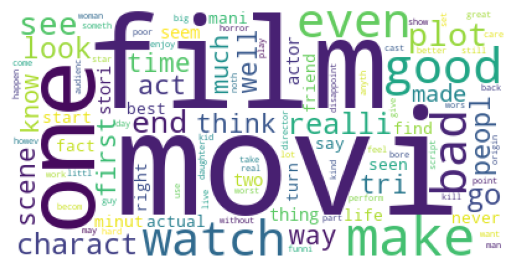

In [45]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# create a word cloud
wordcloud = WordCloud(background_color="white",
                      stopwords=STOPWORDS,
                      max_words=100,
                      random_state=42
                      ).generate(' '.join(df['review'].to_list()))

# display the word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


## Sentiment Analysis
https://monkeylearn.com/sentiment-analysis/

### What is it?
 - **Sentiment analysis** is a technique that uses natural language processing to **analyze the emotions in a piece of text**. It is also known as **opinion mining**, deriving the opinion or attitude of a speaker.

- It can be used to analyze social media comments, product reviews, survey responses, and so much more!


### Types of sentiment analysis
There are two main types of sentiment analysis:
- **Polarity detection**: Polarity detection is the most common type of sentiment analysis. It involves classifying a statement as either **positive, negative, or neutral**.
- **Emotion detection**: Emotion detection is a more advanced type of sentiment analysis that detects emotions in a text. It involves detecting a whole range of emotions, such as, joy, anger, disgust, sadness, fear, surprise, or anticipation.


### Sentiment analysis using text classification
Text classification is the process of assigning tags or categories to text according to its content. It’s one of the fundamental tasks in natural language processing (NLP) with broad applications such as sentiment analysis, topic labeling, spam detection, and intent detection.

The sentiment analysis process using text classification consists of the following steps:
- **Data collection**: The first step is to collect the data. This data can be in the form of text, audio, or video. For example, if you want to analyze the sentiment of tweets, you’ll need to collect tweets that you want to analyze.
- **Data labeling**: The next step is to label the data. This means that you need to manually assign a sentiment label to each piece of text. For example, if you want to analyze the sentiment of tweets, you’ll need to label each tweet as positive, negative, or neutral. Or with an emotion.
- ** Preprocessing the data**: The next step is to preprocess the data. This means that you need to clean the data and transform it into a format that can be used by a machine learning algorithm. For example, you can remove punctuation and convert all letters to lowercase.
- **Training a text classification model**: The next step is to train a text classification model. This means that you need to feed the labeled data into a machine learning algorithm so that it can learn how to classify text. For example, you can train a text classification model to classify tweets as positive, negative, or neutral.
- **Evaluating the model**: The final step is to evaluate the model. This means that you need to test the model on a set of data that it hasn’t seen before. For example, you can test the model on a set of tweets that it hasn’t seen before to see how well it can classify them.
- **Deploying the model**: The final step is to deploy the model. This means that you need to make the model available for use. For example, you can deploy the model as a web service so that it can be used to analyze the sentiment of tweets.

![text classification](./images/text_processing_model.png)


### Sentiment analysis using BoW

Ley us start by remembering our dataset. We have the IMDB dataset of review dataset

In [46]:
df = load_and_preprocess_IMDB('train')
df.head()

,filename,review,classification,sentiment,original_review
0,1821_4.txt,work one best shakespear sourc film manag cred...,4,0,Working with one of the best Shakespeare sourc...
1,10402_1.txt,well tremor origin start found movi quit enjoy...,1,0,"Well...tremors I, the original started off in ..."
2,1062_4.txt,ouch one bit pain sit cute amus premis goe hel...,4,0,Ouch! This one was a bit painful to sit throug...
3,9056_1.txt,seen crappi movi life one must among worst def...,1,0,"I've seen some crappy movies in my life, but t..."
4,5392_3.txt,carrier follow exploit two guy two gal stolen ...,3,0,"""Carriers"" follows the exploits of two guys an..."


For which the distribution of sentiment is the following

In [47]:
df.groupby(by='sentiment').count()

,filename,review,classification,original_review
sentiment,,,,
0,12500,12500,12500,12500
1,12500,12500,12500,12500


Let us generate the BoW matrix

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(lowercase=True, # it should already be in lower case...
                                   stop_words='english', # stop words should already have been removed but ...
                                   ngram_range = (1,1))

count_vectors_train = count_vectorizer.fit_transform(df['review'])
count_vectors_train

<25000x48815 sparse matrix of type '<class 'numpy.int64'>'
	with 2083655 stored elements in Compressed Sparse Row format>

Build a dataframe with BoW and add the sentiment column

In [49]:
bow_train = pd.DataFrame(count_vectors_train.toarray(), columns=count_vectorizer.get_feature_names_out())
bow_train

,aa,aaa,aaaaaaah,aaaaah,aaaaatch,aaaahhhhhhh,aaaand,aaaarrgh,aaah,aaargh,...,était,état,étc,éveri,êxtase,ís,ísnt,østbye,über,üvegtigri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we don+t need to split the data into train and test, because that is already provided by the dataset.
Let us just try is using a random forest classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model (send bow_train or the count_vectors_train)
rf.fit(bow_train, df['sentiment'])


RandomForestClassifier(random_state=42)

Now, load the test data and pass it through the BoW

In [51]:
df_test = load_and_preprocess_IMDB('test')
count_vectors_test = count_vectorizer.transform(df_test['review'])

Build the BoW matrix

In [52]:
bow_test = pd.DataFrame(count_vectors_test.toarray(), columns=count_vectorizer.get_feature_names_out())
bow_test

,aa,aaa,aaaaaaah,aaaaah,aaaaatch,aaaahhhhhhh,aaaand,aaaarrgh,aaah,aaargh,...,était,état,étc,éveri,êxtase,ís,ísnt,østbye,über,üvegtigri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And predict the sentiment and coresponding score

In [53]:
rf.score(bow_test, df_test['sentiment'])

0.84972

Let us see some examples

In [54]:
def info(idx):
    review = df_test.loc[idx, 'original_review']
    target = df_test.loc[idx, 'sentiment']
    classification = df_test.loc[idx, 'classification']
    pred = rf.predict([bow_test.loc[idx]])
    print(f'real sentiment: {target} (classfication: {classification}) / precicted sentiment: {pred}')
    print(f'[{idx}]', review)

import random

for idx in random.sample(range(len(df_test)), 5):
    info(idx)
    print('-------------------')

real sentiment: 0 (classfication: 4) / precicted sentiment: [1]
[1919] Butter Battle is an entertaining story about two fictional cities and their arms race. It is also as misguided allegory about the Cold-War and arms races in general. Yes, it is a children's book, but like so many of Theodor Seuss Geisel's works it hits people over the head with its moral.<br /><br />And that moral is what, exactly? Sure it is laudable to encourage us to concentrate more on what unites us than what divides us. It is even a good thing to encourage international cooperation. But to equate the differences between the Warsaw Pact nations and the Nato west to a difference in butter application is just plain wrong. To point out the obvious, many Warsaw Pact nations enjoyed intermittent periods of shortages of butter and bread -- they would have been happy to eat it butter sideways if it were available. On a less literal level, and whatever your political inclination, Soviet socialism versus Western (partic

/Users/pcardoso/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/pcardoso/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/pcardoso/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/pcardoso/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/pcardoso/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  

Save the model

In [55]:
import pickle

# save the model to disk
filename = 'rf_model.sav'
pickle.dump(rf, open(filename, 'wb'))

# save the vectorizer to disk
filename = 'count_vectorizer.sav'
pickle.dump(count_vectorizer, open(filename, 'wb'))

## References
1. Aggarwal, C. (2015). Data Mining: The Textbook. Springer.
2. Navlani, A., Fandango, A., & Idris, I. (2021). Python Data Analysis: Perform Data Collection. In Data Processing, Wrangling, Visualization, and Model Building Using Python. Packt Publishing Ltd..
2. Zong, C., Xia, R., & Zhang, J. (2021). Text data mining (Vol. 711, p. 712). Singapore: Springer.
2.